<a href="https://colab.research.google.com/github/naanadr/face_detection_projects/blob/master/face_detection_tdc_recife/face_detection_tdc_recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/naanadr/face_detection_projects.git

Cloning into 'face_detection_projects'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (575/575), done.
remote: Compressing objects: 100% (529/529), done.
remote: Total 2207 (delta 37), reused 543 (delta 15), pack-reused 1632
Receiving objects: 100% (2207/2207), 186.55 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (111/111), done.
Checking out files: 100% (638/638), done.


In [17]:
!git pull origin master

From https://github.com/FernandaSzAdr/face_detection_projects
 * branch            master     -> FETCH_HEAD
Already up to date.


In [18]:
cd face_detection_projects/face_detection_tdc_recife/

/content/face_detection_projects/face_detection_tdc_recife/face_detection_projects/face_detection_tdc_recife


# Imports

In [0]:
import cv2
import dlib
from imutils import face_utils
import numpy as np

from google.colab.patches import cv2_imshow

# Códigos!!!


## Dlib detecção de rosto

Preparativos...


In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('helpers/'
                                  'shape_predictor_68_face_landmarks.dat')

In [0]:
def get_coordinates(image, point):
  global detector
  global predictor

  frame = image.copy()

  rects = detector(frame, 1)
  
  points = []

  if len(rects) > 0:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    for rect in rects:
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        if i == point:
          points.append((x, y))
      
  return points

In [0]:
def face_detection(frame):
  global detector
    
  rects = detector(frame, 1)

  if len(rects) > 0:
    cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
      cv2.rectangle(frame, (bX, bY), (bX + bW, bY + bH),
                    (0, 255, 0), 2)

  return frame
  

In [0]:
def draw_line(frame, points):
  for index, item in enumerate(points): 
      if index == len(points) -1:
          break
      cv2.line(frame, item, points[index + 1], [0, 255, 0], 2) 
  
  return frame

In [0]:
def landmarks_draw(image):
  global detector
  global predictor

  frame = image.copy()

  rects = detector(frame, 1)

  if len(rects) > 0:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    for rect in rects:
      points = []
  
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        if i < 17:
          points.append((x, y))
      
      frame = draw_line(frame, points)
  
  return frame

In [0]:
def landmarks_detection(image):
  global detector
  global predictor

  frame = image.copy()

  rects = detector(frame, 1)

  if len(rects) > 0:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
        cv2.putText(frame, str(i + 1), (x - 10, y - 10),
          cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

  return frame

## Começando as doideiras

(1200, 1200, 3)


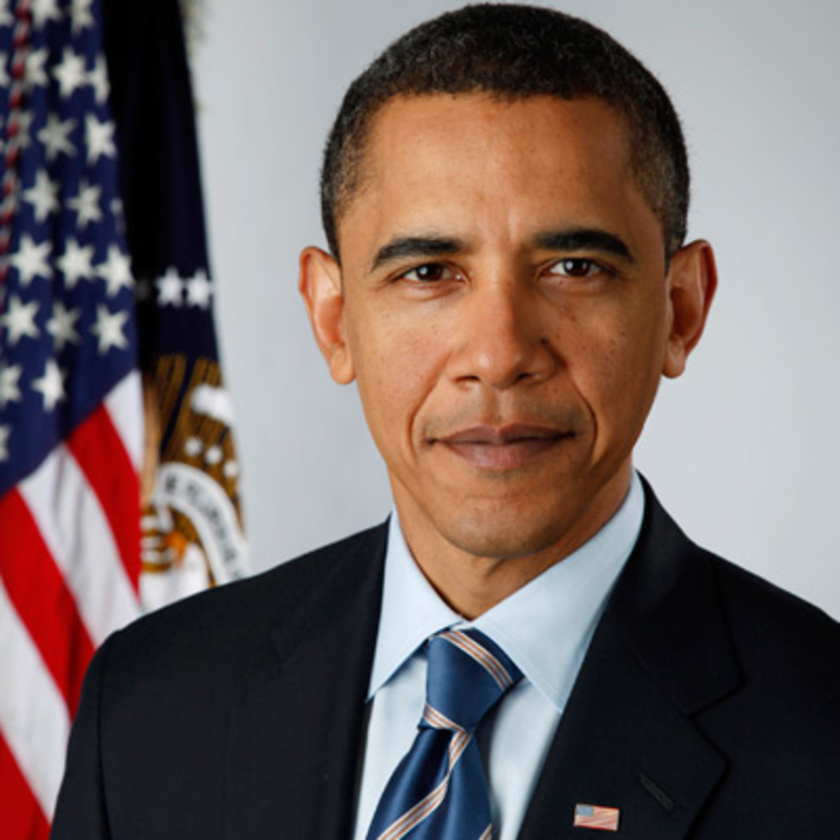

In [26]:
image = cv2.imread('persons/barack_obama.jpg')

print(image.shape)
image = cv2.resize(image, None, fx=0.7, fy=0.7)
  
cv2_imshow(image)

### Captura o rosto

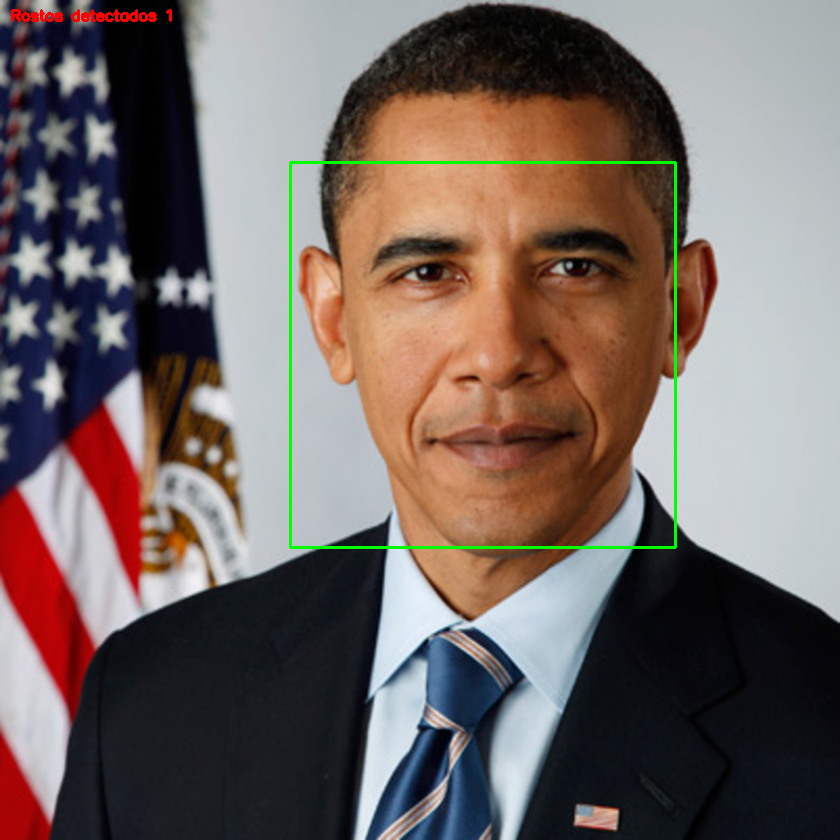

In [27]:
cv2_imshow(face_detection(image))

### E se tiver mais de um rosto?

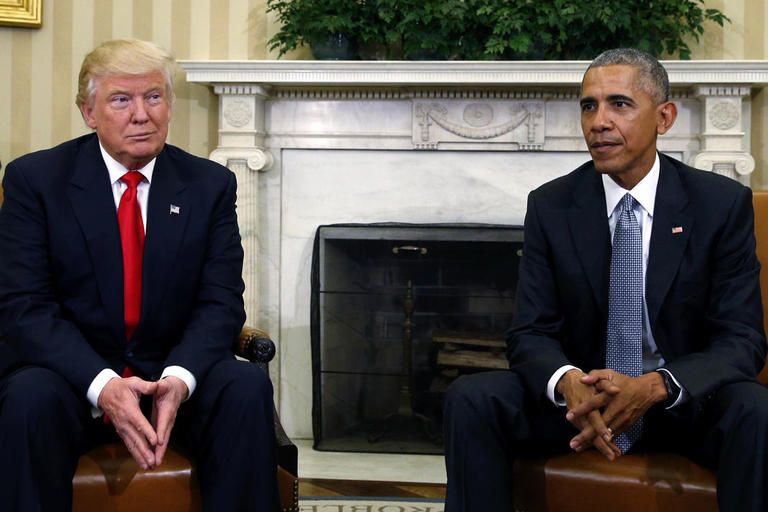

In [28]:
image = cv2.imread('persons/pessoas_02.jpg')
  
cv2_imshow(image)

### Será que ele detecta mesmo todos os rostos?


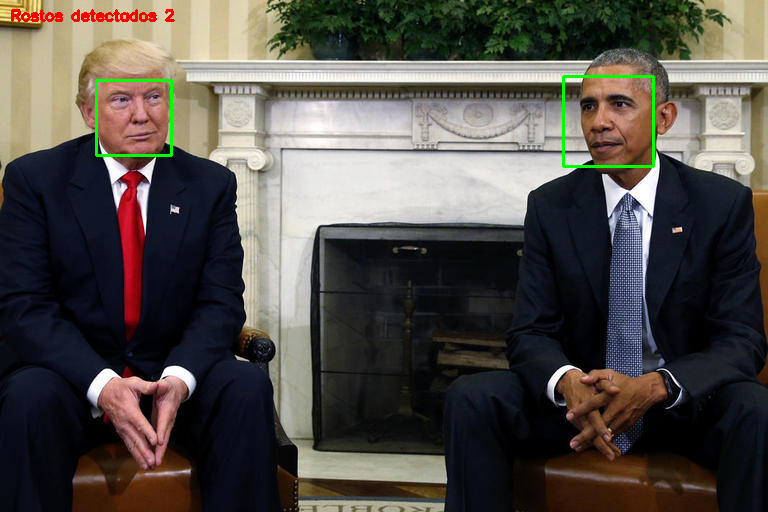

In [29]:
cv2_imshow(face_detection(image))

## Pontos de interesse do rosto



![alt text](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg)

## Vamos ver esses pontos nas imagens

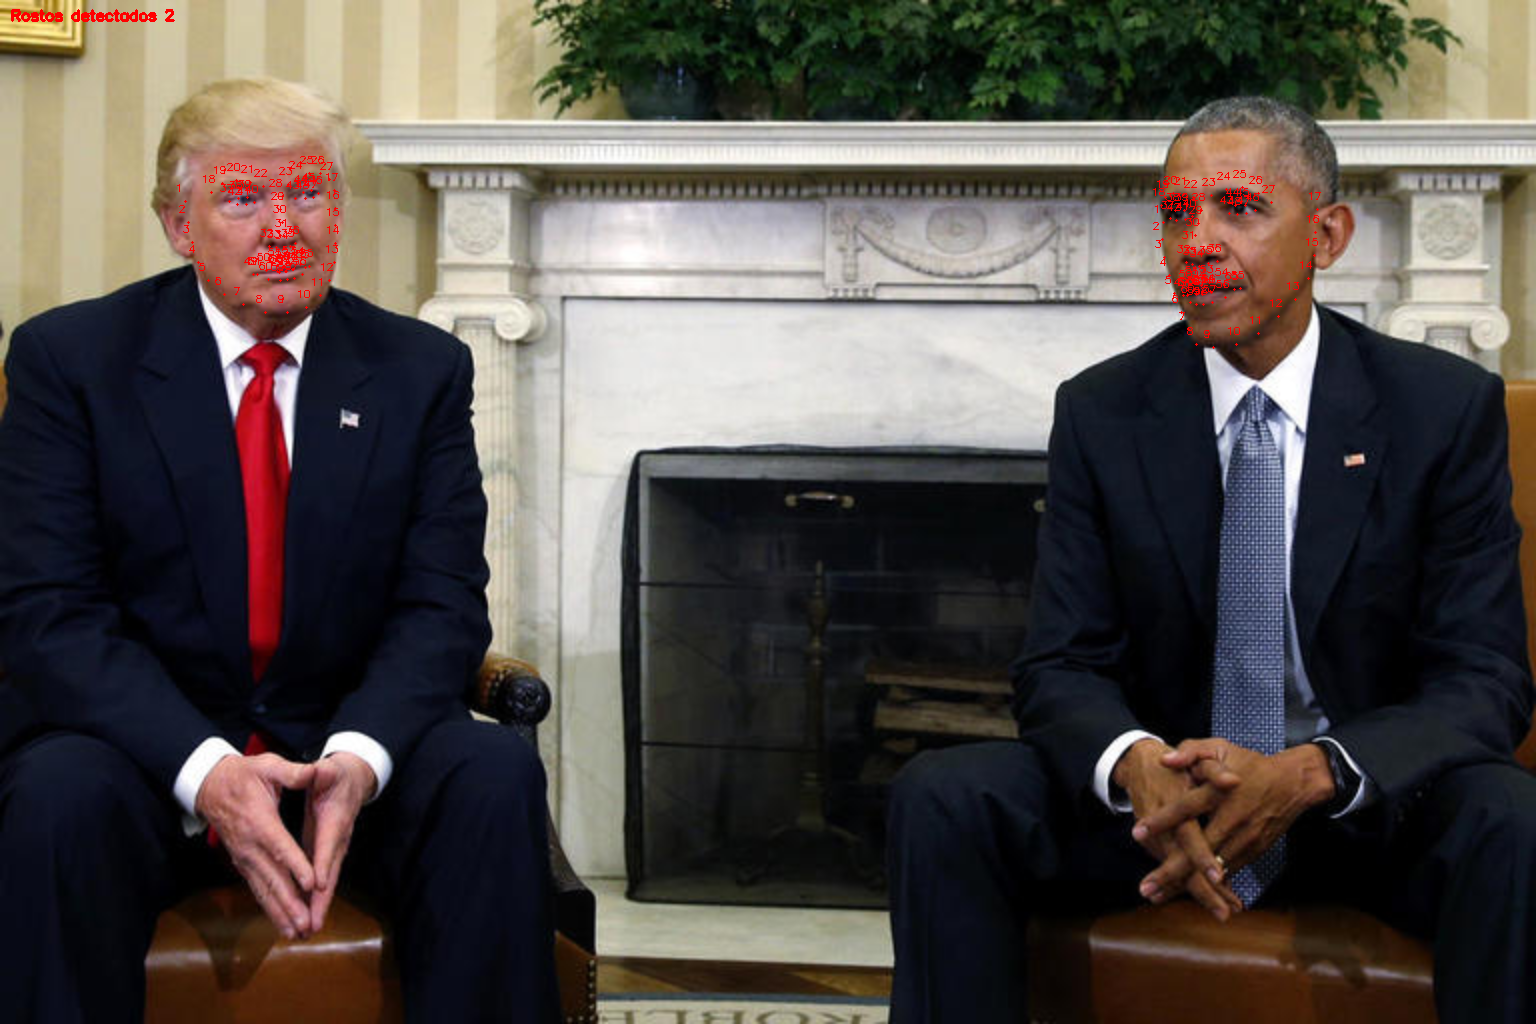

In [30]:
image = cv2.imread('persons/pessoas_02.jpg')

image = cv2.resize(image, None, fx=2, fy=2)

cv2_imshow(landmarks_detection(image))

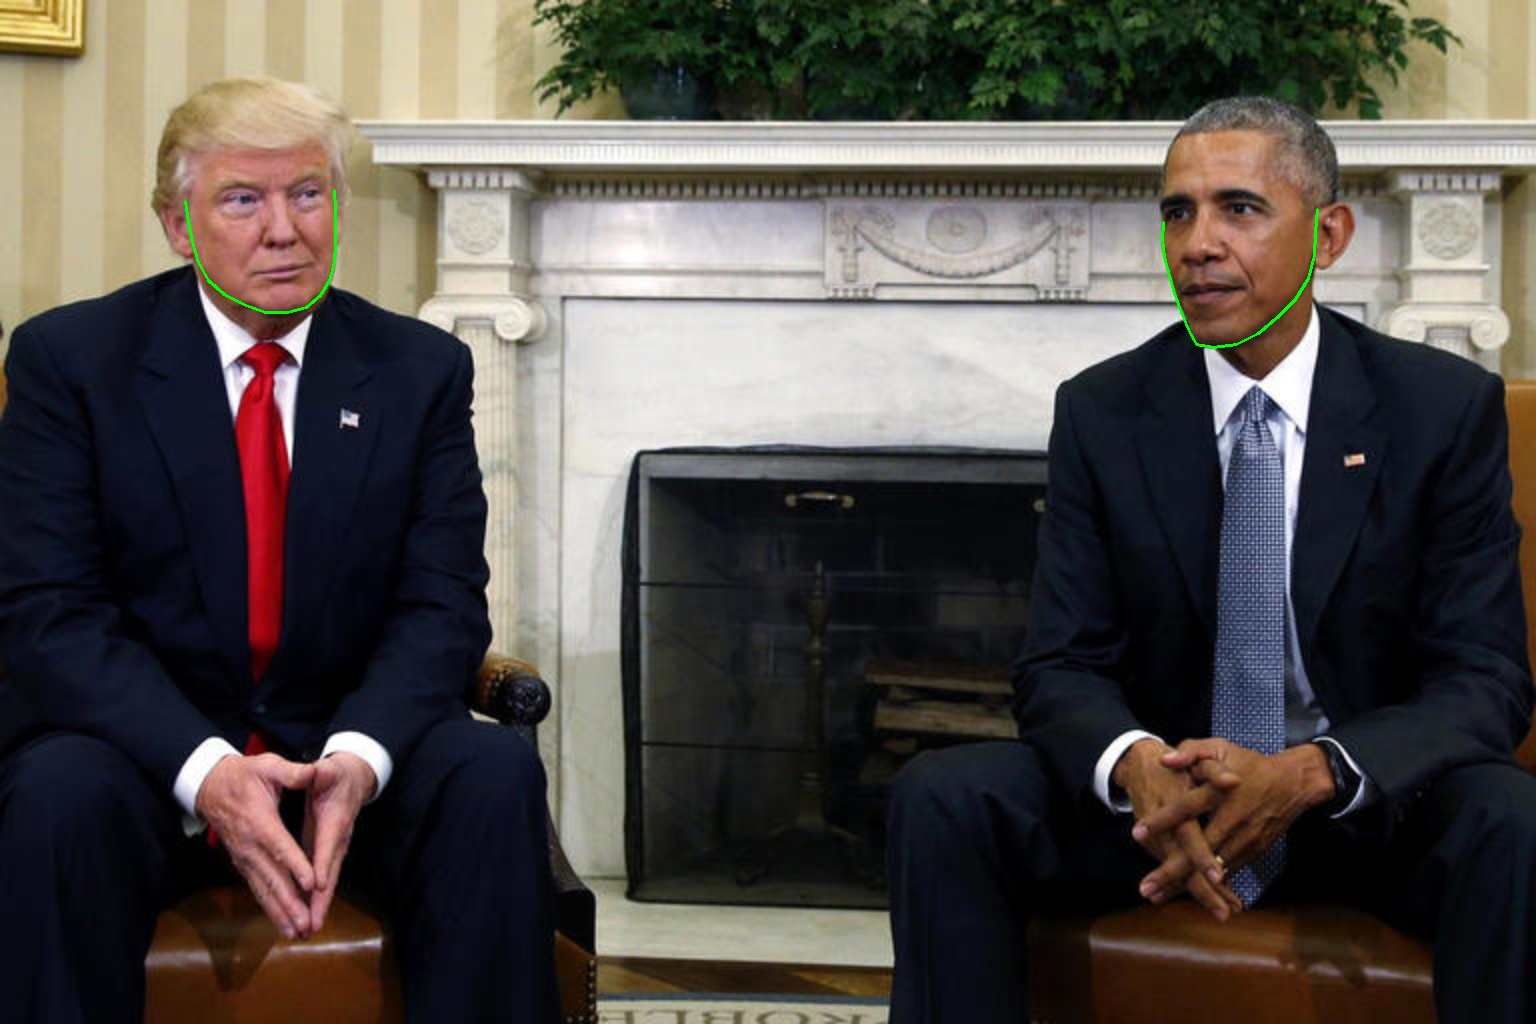

In [31]:
cv2_imshow(landmarks_draw(image))

## Regiões de interesse do rosto

### Boca

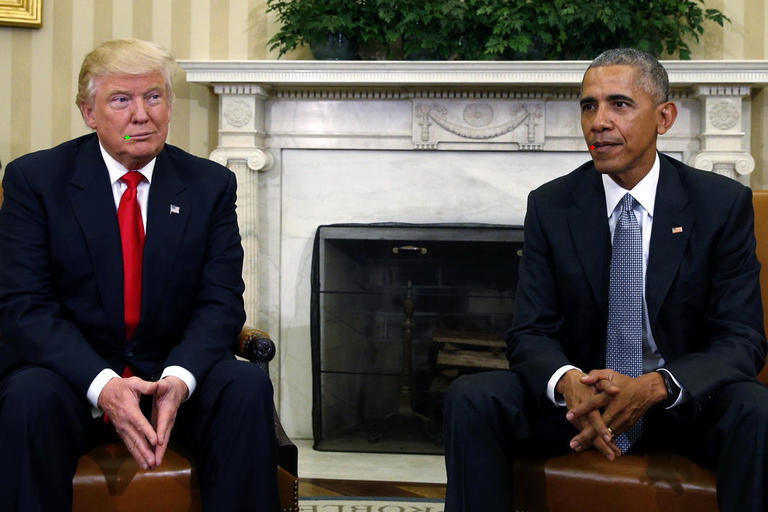

In [104]:
image = cv2.imread('persons/pessoas_02.jpg')

canto_esquerdo = get_coordinates(image, 48)
canto_superior = get_coordinates(image, 51)
canto_inferior = get_coordinates(image, 57)
canto_direito = get_coordinates(image, 54)


output = image.copy()
cv2.circle(output, canto_esquerdo[0], 2, (0, 0, 255), -1)
cv2.circle(output, canto_esquerdo[1], 2, (0, 255, 0), -1)
cv2_imshow(output)

### Trump

In [105]:
x1, y1 = canto_esquerdo[1]
x2, y2 = canto_superior[1]
x3, y3 = canto_inferior[1]
x4, y4 = canto_direito[1]

width = x4 - x1 + 4

y = min(y1, y2, y3, y4) - 4
x1 = x1 - 4
height = max(y1, y2, y3, y4) - y + 4

cv2_imshow(image[y: y + height, x1: x1 + width])

### Obama

In [106]:
x1, y1 = canto_esquerdo[0]
x2, y2 = canto_superior[0]
x3, y3 = canto_inferior[0]
x4, y4 = canto_direito[0]

width = x4 - x1 + 4

y = min(y1, y2, y3, y4) - 4
x1 = x1 - 4
height = max(y1, y2, y3, y4) - y + 4

cv2_imshow(image[y: y + height, x1: x1 + width])

### Vamos princar um pouco... ou tentar.

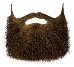

In [107]:
stickers = cv2.imread('stickers/barba_02.png', -1)
watermark = cv2.resize(stickers, None, fx=0.1, fy=0.1)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)

cv2_imshow(watermark)

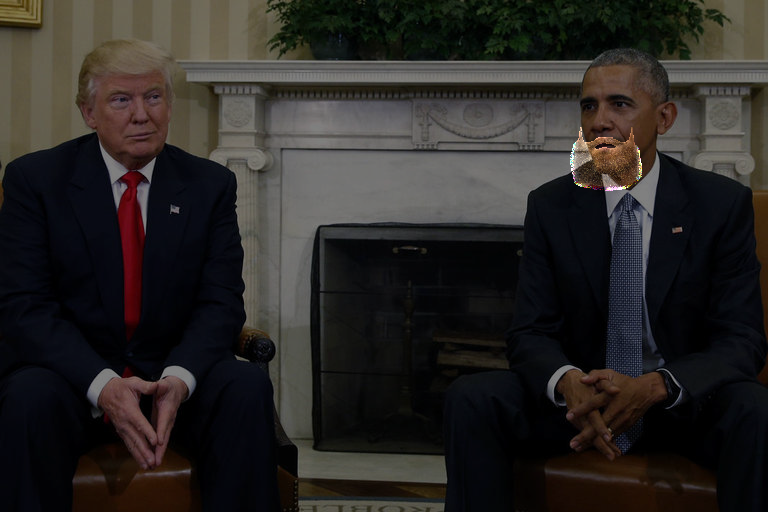

In [120]:
frame = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
frame_h, frame_w, frame_c = frame.shape
# overlay with 4 channels BGR and Alpha
overlay = np.zeros((frame_h, frame_w, 4), dtype='uint8')
watermark_h, watermark_w, watermark_c = watermark.shape
# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
  for j in range(0, watermark_w):
    if watermark[i,j][3] != 0:
      w_offset = x2 - width
      h_offset = y2 - height
      overlay[h_offset + i, w_offset+ j] = watermark[i,j]

cv2.addWeighted(overlay, 1, frame, 0.5, 0, frame)

frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)

cv2_imshow(frame)

### Vamos usar outra imagem...

(512, 768, 3)


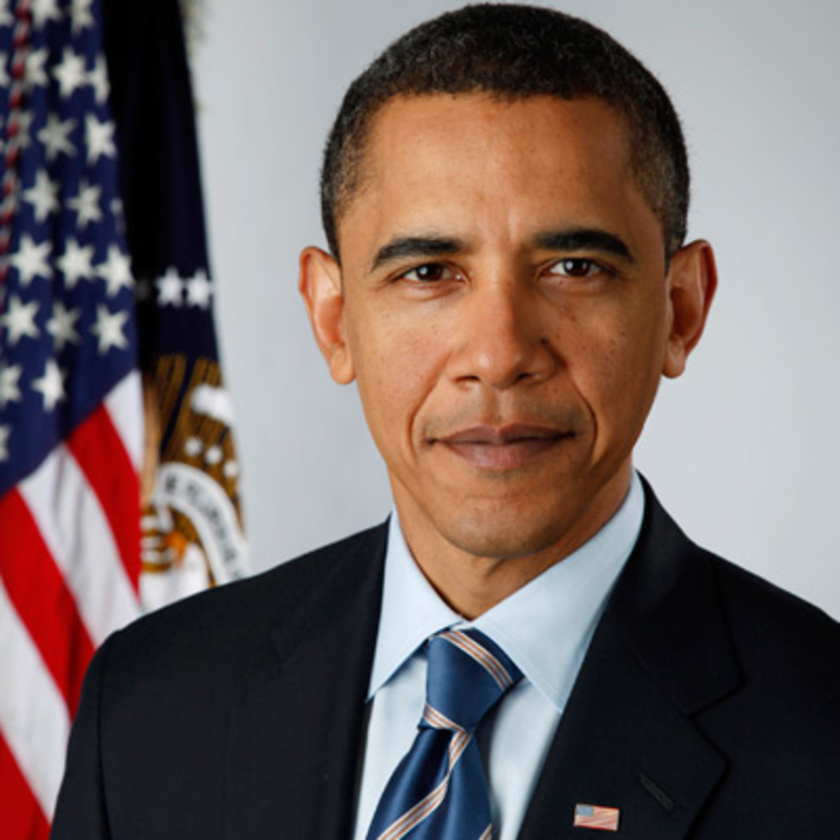

In [121]:
new_image = cv2.imread('persons/barack_obama.jpg')

print(image.shape)
new_image = cv2.resize(new_image, None, fx=0.7, fy=0.7)
  
cv2_imshow(new_image)

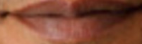

In [122]:
canto_esquerdo = get_coordinates(new_image, 48)
canto_superior = get_coordinates(new_image, 51)
canto_inferior = get_coordinates(new_image, 57)
canto_direito = get_coordinates(new_image, 54)

x1, y1 = canto_esquerdo[0]
x2, y2 = canto_superior[0]
x3, y3 = canto_inferior[0]
x4, y4 = canto_direito[0]

width = x4 - x1 + 4

y = min(y1, y2, y3, y4) - 4
x1 = x1 - 4
height = max(y1, y2, y3, y4) - y + 4

cv2_imshow(new_image[y: y + height, x1: x1 + width])

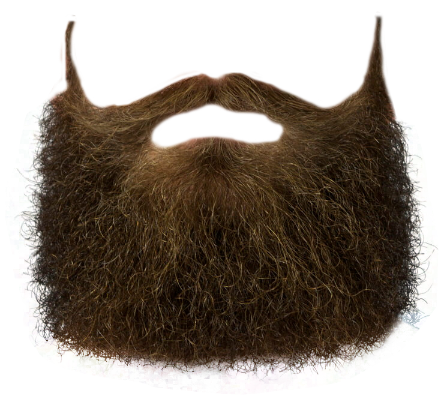

In [123]:
stickers = cv2.imread('stickers/barba_02.png', -1)
watermark = cv2.resize(stickers, None, fx=0.6, fy=0.6)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)

cv2_imshow(watermark)

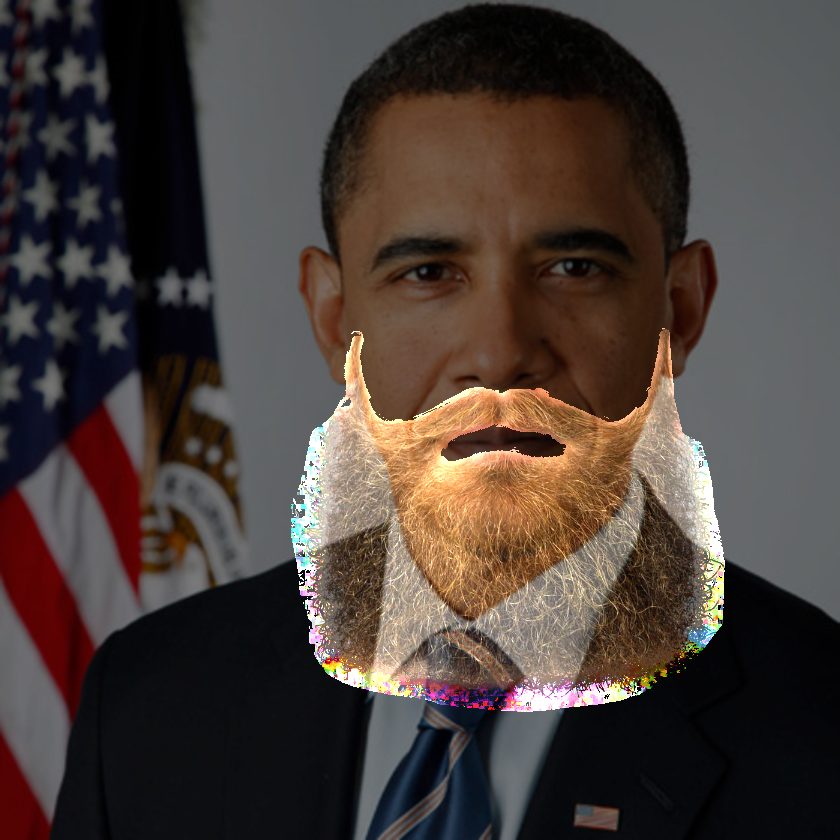

In [133]:
frame = cv2.cvtColor(new_image, cv2.COLOR_BGR2BGRA)
frame_h, frame_w, frame_c = frame.shape

# overlay with 4 channels BGR and Alpha
overlay = np.zeros((frame_h, frame_w, 4), dtype='uint8')
watermark_h, watermark_w, watermark_c = watermark.shape
# replace overlay pixels with watermark pixel values
for i in range(0, watermark_h):
  for j in range(0, watermark_w):
    if watermark[i,j][3] != 0:
      offset_h = 70
      
      w_offset = x1 - width 
      h_offset = y2 - height - offset_h
      overlay[h_offset + i, w_offset+ j] = watermark[i,j]

cv2.addWeighted(overlay, 1.5, frame, 0.5, 0, frame)

frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)

cv2_imshow(frame)